In [38]:
import numpy as np
import pandas as pd
import yfinance as yf
import pypfopt as pf
import warnings

warnings.filterwarnings('ignore')

In [39]:
ativos = yf.download(['IVV','AGG'],start='2005-01-01')['Close']

ativos_retornos = ativos.pct_change().fillna(0)

cov_matrix = ativos_retornos.cov()

vol = ativos_retornos.std()

[*********************100%***********************]  2 of 2 completed


In [40]:
grupo_retornos_anual = []
for i in list(ativos.index.year.unique()):
    grupo_retornos_anual.append(ativos_retornos.loc[ativos_retornos.index.year == i])

In [41]:
pesos_ano = {}

for i in range(len(grupo_retornos_anual)):
    
    ano_x = grupo_retornos_anual[i]

    retorno_anual_med = ano_x.mean()*252

    if  retorno_anual_med.iloc[0] < 0:
        retorno_anual_med.iloc[0] = 0.01

    if  retorno_anual_med.iloc[1] < 0:
        retorno_anual_med.iloc[1] = 0.05

    cov_matrix_ano_x = ano_x.cov()*252
    vol_med_ano_x = ano_x.std()
    

    ef = pf.EfficientFrontier(retorno_anual_med,cov_matrix_ano_x)
    
    weights = ef.max_sharpe()
    
    cleaned_weights = ef.clean_weights()
    pesos_ano[2006+i] = cleaned_weights

    df_pesos_ano = pd.DataFrame(pesos_ano).T

ativos_retornos['Ano'] = ativos_retornos.index.year

df_merged_sharpe = pd.merge(
    ativos_retornos,
    df_pesos_ano,
    how='left',               # mantém o índice/ordem da esquerda
    left_on='Ano',
    right_index=True,
    suffixes=('_Retornos', '_Pesos')
)

# garante que o index final é igual ao do DF left
df_merged_sharpe.index = ativos_retornos.index
df_merged_sharpe.drop(columns=['Ano'],inplace = True)
df_merged_sharpe.tail(4)

df_merged_sharpe['PF'] = (((df_merged_sharpe['AGG_Retornos'] * df_merged_sharpe['AGG_Pesos']) + (df_merged_sharpe['IVV_Retornos'] * df_merged_sharpe['IVV_Pesos']))+1).cumprod()

df_merged_sharpe['PF']

Date
2005-01-03         NaN
2005-01-04         NaN
2005-01-05         NaN
2005-01-06         NaN
2005-01-07         NaN
                ...   
2025-12-05    4.948495
2025-12-08    4.933774
2025-12-09    4.929824
2025-12-10    4.961492
2025-12-11    4.973556
Name: PF, Length: 5270, dtype: float64

In [42]:
pesos_ano = {}

for i in range(len(grupo_retornos_anual)):
    
    ano_x = grupo_retornos_anual[i]

    retorno_anual_med = ano_x.mean()*252

    if  retorno_anual_med.iloc[0] < 0:
        retorno_anual_med.iloc[0] = 0.01

    if  retorno_anual_med.iloc[1] < 0:
        retorno_anual_med.iloc[1] = 0.05

    cov_matrix_ano_x = ano_x.cov()*252
    vol_med_ano_x = ano_x.std()
    

    ef = pf.EfficientFrontier(retorno_anual_med,cov_matrix_ano_x)
    
    weights = ef.min_volatility()
    
    cleaned_weights = ef.clean_weights()
    pesos_ano[2006+i] = cleaned_weights

    df_pesos_ano = pd.DataFrame(pesos_ano).T

ativos_retornos['Ano'] = ativos_retornos.index.year

df_merged_vol = pd.merge(
    ativos_retornos,
    df_pesos_ano,
    how='left',               # mantém o índice/ordem da esquerda
    left_on='Ano',
    right_index=True,
    suffixes=('_Retornos', '_Pesos')
)

# garante que o index final é igual ao do DF left
df_merged_vol.index = ativos_retornos.index
df_merged_vol.drop(columns=['Ano'],inplace = True)
df_merged_vol.tail(4)

df_merged_vol['PF'] = (((df_merged_vol['AGG_Retornos'] * df_merged_vol['AGG_Pesos']) + (df_merged_vol['IVV_Retornos'] * df_merged_vol['IVV_Pesos']))+1).cumprod()

df_merged_vol['PF']

Date
2005-01-03         NaN
2005-01-04         NaN
2005-01-05         NaN
2005-01-06         NaN
2005-01-07         NaN
                ...   
2025-12-05    2.128701
2025-12-08    2.124962
2025-12-09    2.123072
2025-12-10    2.130661
2025-12-11    2.131253
Name: PF, Length: 5270, dtype: float64

In [43]:
pesos_ano = {}

for i in range(len(grupo_retornos_anual)):
    
    ano_x = grupo_retornos_anual[i]

    retorno_anual_med = ano_x.mean()*252

    if  retorno_anual_med.iloc[0] < 0:
        retorno_anual_med.iloc[0] = 0.01

    if  retorno_anual_med.iloc[1] < 0:
        retorno_anual_med.iloc[1] = 0.05

    cov_matrix_ano_x = ano_x.cov()*252
    vol_med_ano_x = ano_x.std()
    

    ef = pf.EfficientFrontier(retorno_anual_med,cov_matrix_ano_x)
    
    weights = ef._max_return()
    
    cleaned_weights = ef.clean_weights()
    pesos_ano[2006+i] = cleaned_weights

    df_pesos_ano = pd.DataFrame(pesos_ano).T

ativos_retornos['Ano'] = ativos_retornos.index.year

df_merged_return = pd.merge(
    ativos_retornos,
    df_pesos_ano,
    how='left',               # mantém o índice/ordem da esquerda
    left_on='Ano',
    right_index=True,
    suffixes=('_Retornos', '_Pesos')
)

# garante que o index final é igual ao do DF left
df_merged_return.index = ativos_retornos.index
df_merged_return.drop(columns=['Ano'],inplace = True)
df_merged_return.tail(4)

df_merged_return['PF'] = (((df_merged_return['AGG_Retornos'] * df_merged_return['AGG_Pesos']) + (df_merged_return['IVV_Retornos'] * df_merged_return['IVV_Pesos']))+1).cumprod()

df_merged_return['PF']

Date
2005-01-03         NaN
2005-01-04         NaN
2005-01-05         NaN
2005-01-06         NaN
2005-01-07         NaN
                ...   
2025-12-05    9.943607
2025-12-08    9.914027
2025-12-09    9.906091
2025-12-10    9.969725
2025-12-11    9.993967
Name: PF, Length: 5270, dtype: float64

In [50]:
pesos_ano = {}

for i in range(len(grupo_retornos_anual)):
    
    ano_x = grupo_retornos_anual[i]

    retorno_anual_med = ano_x.mean()*252

    if  retorno_anual_med.iloc[0] < 0:
        retorno_anual_med.iloc[0] = 0.01

    if  retorno_anual_med.iloc[1] < 0:
        retorno_anual_med.iloc[1] = 0.05

    cov_matrix_ano_x = ano_x.cov()*252
    vol_med_ano_x = ano_x.std()
    

    ef = pf.EfficientFrontier(retorno_anual_med,cov_matrix_ano_x)
    try:
        weights = ef.efficient_risk(0.1)
    except:
        weights = ef.min_volatility()
    cleaned_weights = ef.clean_weights()
    pesos_ano[2006+i] = cleaned_weights

    df_pesos_ano = pd.DataFrame(pesos_ano).T

ativos_retornos['Ano'] = ativos_retornos.index.year

df_merged_target = pd.merge(
    ativos_retornos,
    df_pesos_ano,
    how='left',               # mantém o índice/ordem da esquerda
    left_on='Ano',
    right_index=True,
    suffixes=('_Retornos', '_Pesos')
)

# garante que o index final é igual ao do DF left
df_merged_target.index = ativos_retornos.index
df_merged_target.drop(columns=['Ano'],inplace = True)
df_merged_target.tail(4)

df_merged_target['PF'] = (((df_merged_target['AGG_Retornos'] * df_merged_target['AGG_Pesos']) + (df_merged_target['IVV_Retornos'] * df_merged_target['IVV_Pesos']))+1).cumprod()

df_merged_target['PF']

Date
2005-01-03         NaN
2005-01-04         NaN
2005-01-05         NaN
2005-01-06         NaN
2005-01-07         NaN
                ...   
2025-12-05    5.391869
2025-12-08    5.377506
2025-12-09    5.373079
2025-12-10    5.403686
2025-12-11    5.413855
Name: PF, Length: 5270, dtype: float64

<Axes: xlabel='Date'>

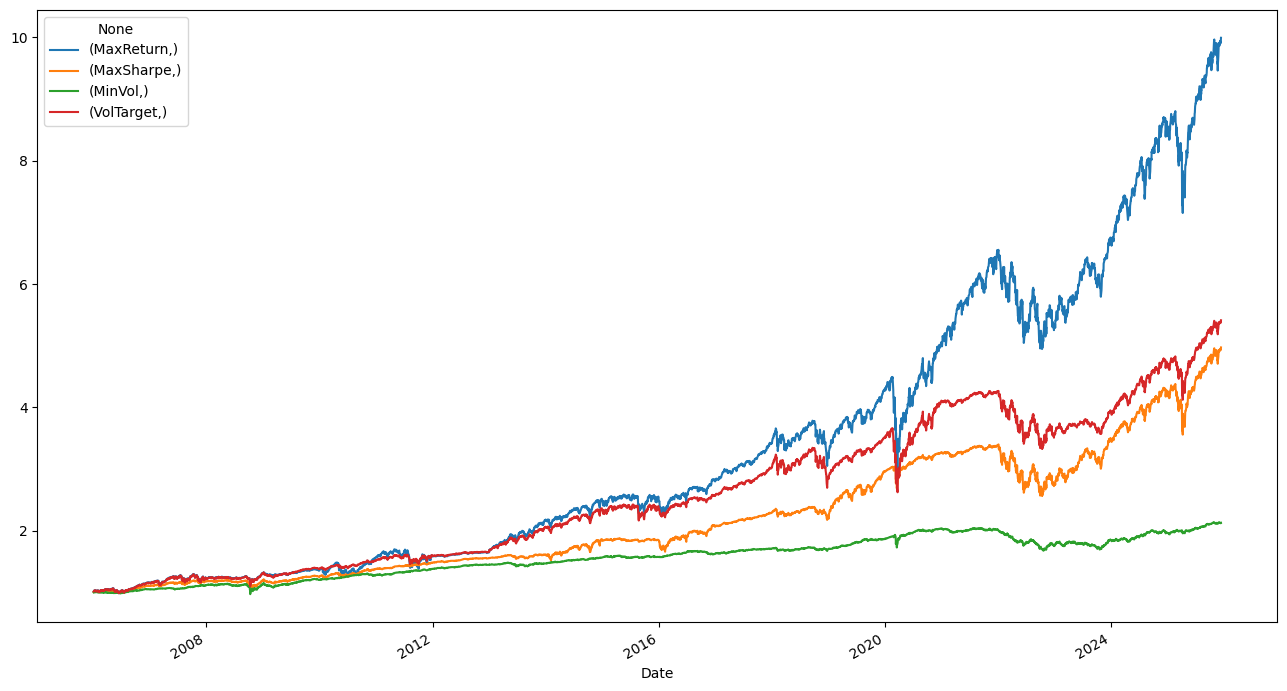

In [51]:
df_geral = pd.concat([df_merged_return['PF'],df_merged_sharpe['PF'],df_merged_vol['PF'],df_merged_target['PF']],axis=1)

df_geral.columns =  [['MaxReturn','MaxSharpe','MinVol','VolTarget']]

df_geral.plot(figsize=(16,9))

In [46]:
df_geral.pct_change().dropna().std()*np.sqrt(252)

MaxReturn    0.160891
MaxSharpe    0.105160
MinVol       0.052181
VolTarget    0.104622
dtype: float64

In [47]:
pesos_ano

{2006: OrderedDict([('AGG', 0.23412), ('IVV', 0.76588)]),
 2007: OrderedDict([('AGG', 0.20764), ('IVV', 0.79236)]),
 2008: OrderedDict([('AGG', 1.0), ('IVV', 0.0)]),
 2009: OrderedDict([('AGG', 0.90612), ('IVV', 0.09388)]),
 2010: OrderedDict([('AGG', 0.72803), ('IVV', 0.27197)]),
 2011: OrderedDict([('AGG', 0.52895), ('IVV', 0.47105)]),
 2012: OrderedDict([('AGG', 1.0), ('IVV', 0.0)]),
 2013: OrderedDict([('AGG', 0.34423), ('IVV', 0.65577)]),
 2014: OrderedDict([('AGG', 0.29267), ('IVV', 0.70733)]),
 2015: OrderedDict([('AGG', 0.27098), ('IVV', 0.72902)]),
 2016: OrderedDict([('AGG', 0.46897), ('IVV', 0.53103)]),
 2017: OrderedDict([('AGG', 0.37949), ('IVV', 0.62051)]),
 2018: OrderedDict([('AGG', 0.0), ('IVV', 1.0)]),
 2019: OrderedDict([('AGG', 0.52616), ('IVV', 0.47384)]),
 2020: OrderedDict([('AGG', 0.33941), ('IVV', 0.66059)]),
 2021: OrderedDict([('AGG', 0.97314), ('IVV', 0.02686)]),
 2022: OrderedDict([('AGG', 0.39785), ('IVV', 0.60215)]),
 2023: OrderedDict([('AGG', 0.99654), 

In [48]:
df_merged_target

,AGG_Retornos,IVV_Retornos,AGG_Pesos,IVV_Pesos,PF
Date,,,,,
2005-01-03,0.000000,0.000000,NaN,NaN,NaN
2005-01-04,-0.000977,-0.012037,NaN,NaN,NaN
2005-01-05,-0.000391,-0.006049,NaN,NaN,NaN
2005-01-06,0.000685,0.004058,NaN,NaN,NaN
2005-01-07,-0.000294,-0.001853,NaN,NaN,NaN
...,...,...,...,...,...
2025-12-05,-0.001098,0.001832,0.41853,0.58147,4.043256
2025-12-08,-0.001599,-0.002975,0.41853,0.58147,4.033556
2025-12-09,-0.000901,-0.000800,0.41853,0.58147,4.030157


In [49]:
zfzdf

NameError: name 'zfzdf' is not defined

In [ ]:
df_merged_target

,AGG_Retornos,IVV_Retornos,AGG_Pesos,IVV_Pesos,PF
Date,,,,,
2005-01-03,0.000000,0.000000,0.00000,1.00000,1.000000
2005-01-04,-0.000977,-0.012037,0.00000,1.00000,0.987963
2005-01-05,-0.000390,-0.006050,0.00000,1.00000,0.981985
2005-01-06,0.000684,0.004058,0.00000,1.00000,0.985970
2005-01-07,-0.000293,-0.001852,0.00000,1.00000,0.984144
...,...,...,...,...,...
2025-12-05,-0.001098,0.001832,0.38653,0.61347,12.339884
2025-12-08,-0.001599,-0.002975,0.38653,0.61347,12.309735
2025-12-09,-0.000901,-0.000800,0.38653,0.61347,12.299402
